In [35]:
library(ggplot2)
library(dplyr)

In [36]:
bike <- read.csv("bikeshare.csv")

In [37]:
head(bike)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
,<chr>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<dbl>,<int>,<int>,<int>
1,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
2,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
3,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
4,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
5,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
6,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1


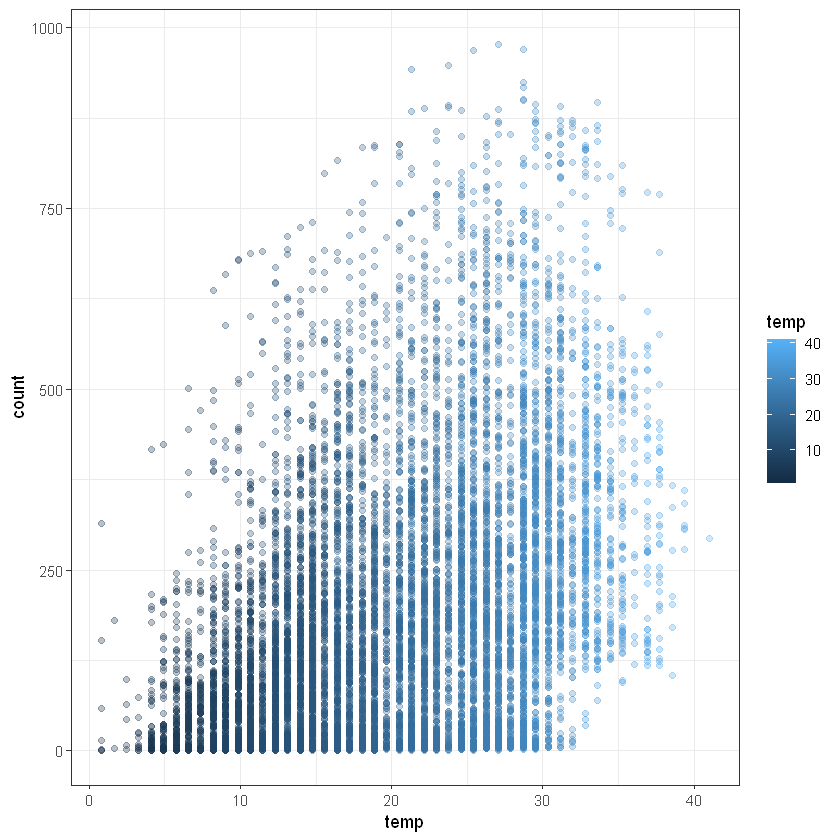

In [38]:
r <- ggplot(bike,aes(temp,count))+geom_point(alpha=0.3,aes(color=temp))+theme_bw()
r

In [39]:
bike$datetime <- as.POSIXct(bike$datetime)
head(bike)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
,<dttm>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<dbl>,<int>,<int>,<int>
1,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
2,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
3,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
4,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
5,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
6,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1


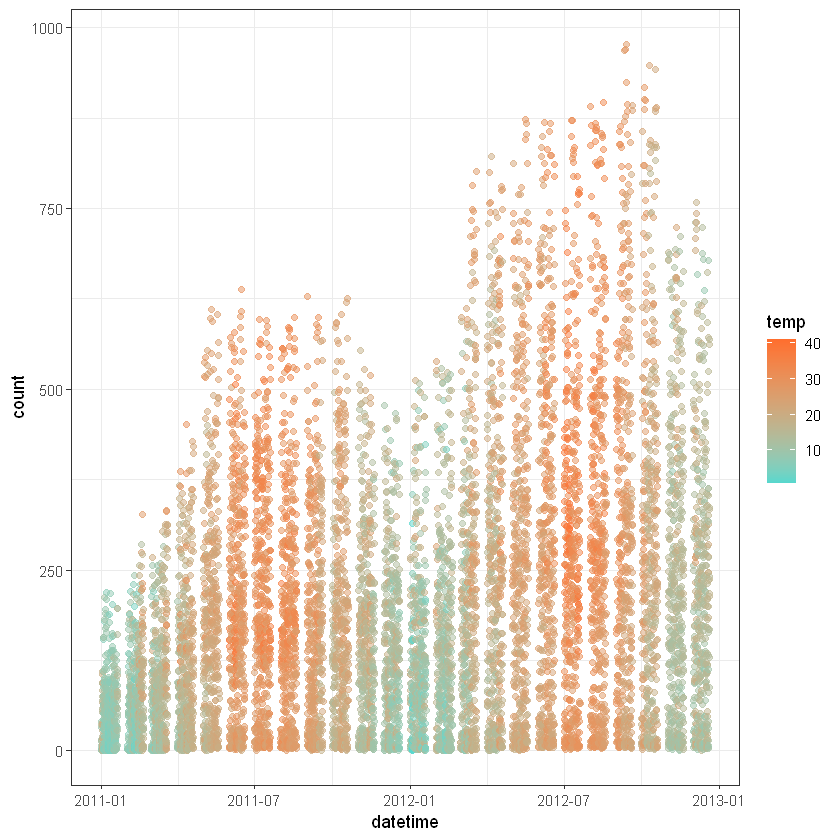

In [40]:
r <- ggplot(bike,aes(datetime,count))+geom_point(aes(color=temp),alpha=0.5)
r <- r + scale_color_continuous(low="#55D8CE",high="#FF6E2E")+theme_bw()
r 

In [41]:
cor(bike[,c('temp','count')])

,temp,count
temp,1.0000000,0.3944536
count,0.3944536,1.0000000


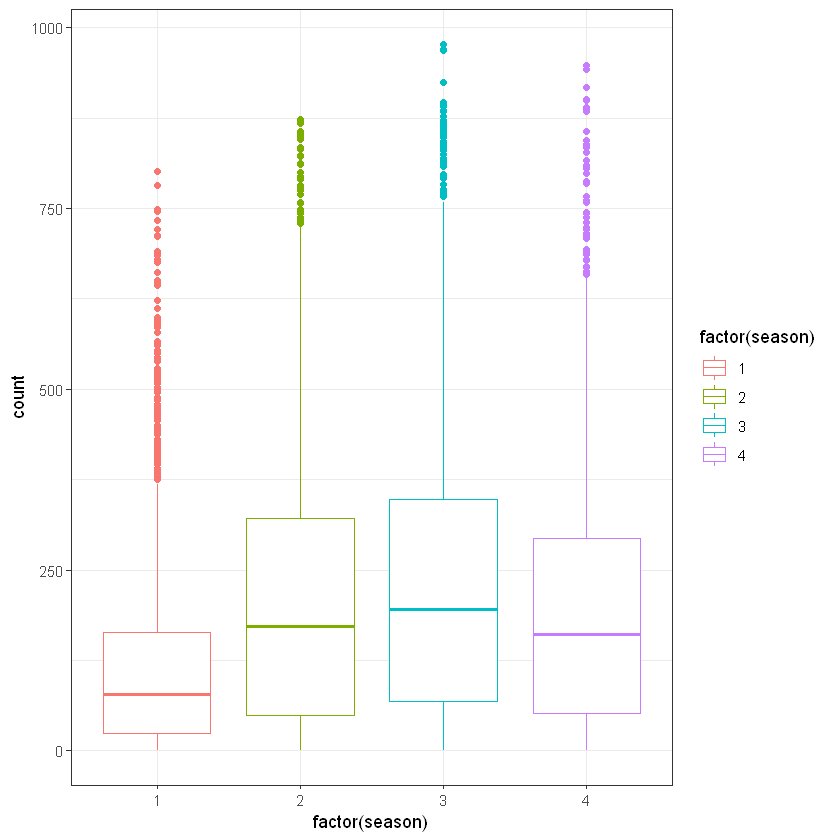

In [42]:
r <- ggplot(bike,aes(factor(season),count))+geom_boxplot(aes(color=factor(season)))+theme_bw()
r

In [43]:
bike$hour <- sapply(bike$datetime,function(x){format(x,"%H")})
head(bike)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour
,<dttm>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<dbl>,<int>,<int>,<int>,<chr>
1,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,00
2,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,01
3,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,02
4,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,03
5,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,04
6,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1,05


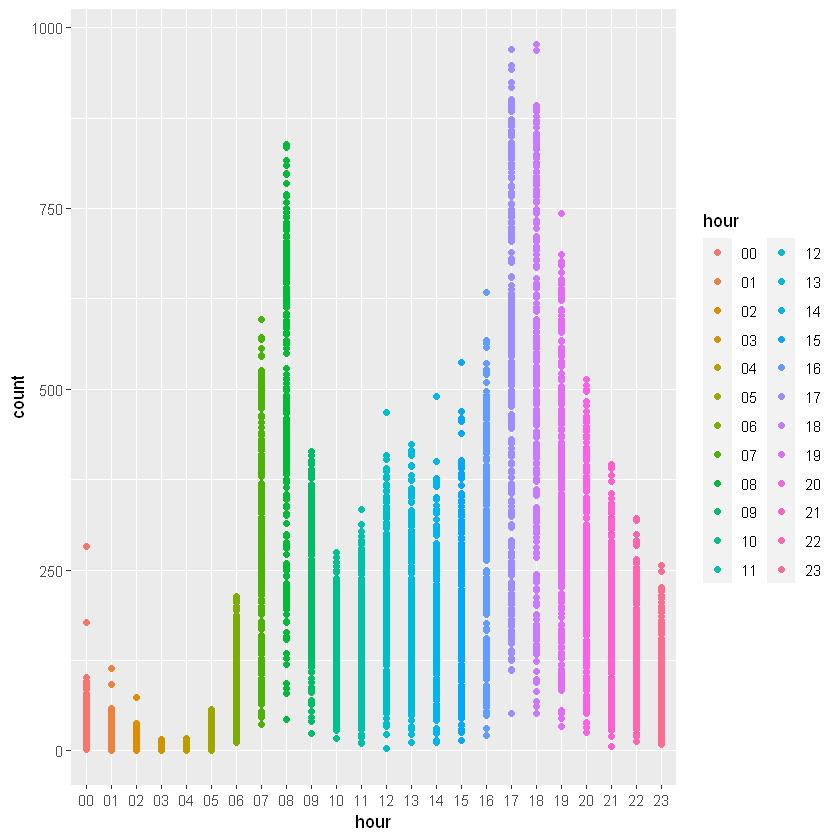

In [44]:
r <- ggplot(filter(bike,workingday==1),aes(hour,count))+geom_point(aes(color=hour))
r

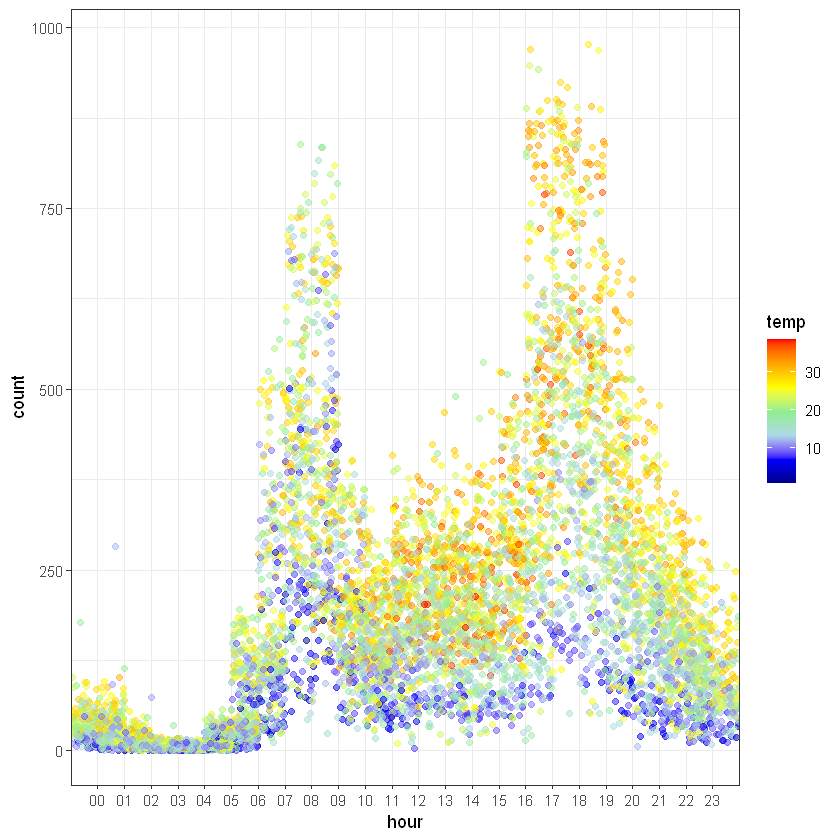

In [45]:
r <- ggplot(filter(bike,workingday==1),aes(hour,count)) 
r <- r + geom_point(position=position_jitter(w=1, h=0),aes(color=temp),alpha=0.5)
r <- r + scale_color_gradientn(colours = c('dark blue','blue','light blue','light green','yellow','orange','red'))
r + theme_bw()

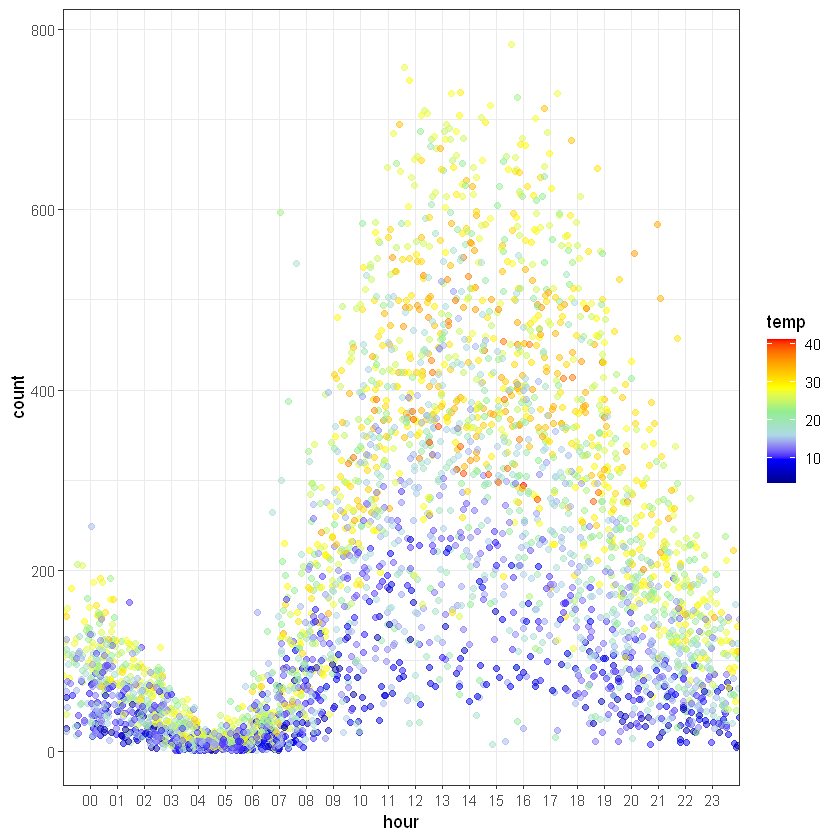

In [46]:
r <- ggplot(filter(bike,workingday==0),aes(hour,count)) 
r <- r + geom_point(position=position_jitter(w=1, h=0),aes(color=temp),alpha=0.5)
r <- r + scale_color_gradientn(colours = c('dark blue','blue','light blue','light green','yellow','orange','red'))
r + theme_bw()

In [47]:
#temp model
temp.model <- lm(count ~ temp,bike)
summary(temp.model)


Call:
lm(formula = count ~ temp, data = bike)

Residuals:
    Min      1Q  Median      3Q     Max 
-293.32 -112.36  -33.36   78.98  741.44 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   6.0462     4.4394   1.362    0.173    
temp          9.1705     0.2048  44.783   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 166.5 on 10884 degrees of freedom
Multiple R-squared:  0.1556,	Adjusted R-squared:  0.1555 
F-statistic:  2006 on 1 and 10884 DF,  p-value: < 2.2e-16


In [48]:
t <- data.frame(temp=c(25))
predict(temp.model,t)

1 
235.3097

In [49]:
bike$hour <- sapply(bike$datetime,function(x){format(x,"%H")})
bike$hour <- sapply(bike$hour,as.numeric)
head(bike)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour
,<dttm>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<dbl>,<int>,<int>,<int>,<dbl>
1,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,0
2,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,1
3,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2
4,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,3
5,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,4
6,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1,5


In [51]:
#temp model
model <- lm(count ~ . -casual -registered -datetime -atemp,bike)
summary(model)


Call:
lm(formula = count ~ . - casual - registered - datetime - atemp, 
    data = bike)

Residuals:
    Min      1Q  Median      3Q     Max 
-324.61  -96.88  -31.01   55.27  688.83 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  46.91369    8.45147   5.551 2.91e-08 ***
season       21.70333    1.35409  16.028  < 2e-16 ***
holiday     -10.29914    8.79069  -1.172    0.241    
workingday   -0.71781    3.14463  -0.228    0.819    
weather      -3.20909    2.49731  -1.285    0.199    
temp          7.01953    0.19135  36.684  < 2e-16 ***
humidity     -2.21174    0.09083 -24.349  < 2e-16 ***
windspeed     0.20271    0.18639   1.088    0.277    
hour          7.61283    0.21688  35.102  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 147.8 on 10877 degrees of freedom
Multiple R-squared:  0.3344,	Adjusted R-squared:  0.3339 
F-statistic:   683 on 8 and 10877 DF,  p-value: < 2.2e-16
